In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
ign_filepath = "E:/Documents/Data Science projects/ign.csv"
ign_data = pd.read_csv(ign_filepath, index_col = 'index')

In [42]:
ign_data.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
index,,,,,,,,,,
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [43]:
ign_data = ign_data.drop_duplicates()

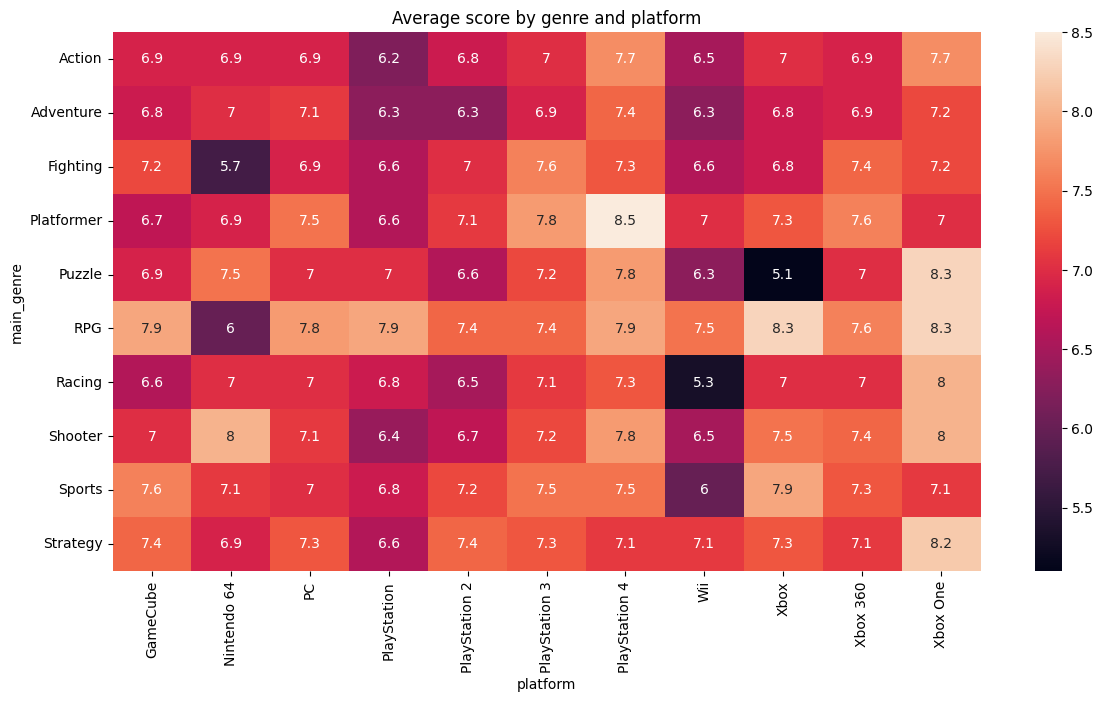

In [86]:
# Removing most of the legacy platforms to make the data more actual
popular_platforms = ['PC','PlayStation','PlayStation 2','PlayStation 3','PlayStation 4', 
                     'Xbox','Xbox 360','Xbox One','Nintendo 64','GameCube','Wii','Switch']
filtered_ign_data = ign_data[ign_data['platform'].isin(popular_platforms)].copy()

# Simplifying genres to make the data more readable
filtered_ign_data['main_genre'] = filtered_ign_data['genre'].str.split(',').str[0]

# Filter genres to most popular ones
top_genres = filtered_ign_data['main_genre'].value_counts().head(10).index

# Grouping data into a table with mean values of platform/genre
scores = filtered_ign_data.groupby(['platform', 'main_genre']).agg(avg_score = ('score', 'mean')).round(1)
scores = scores.reset_index()
avg_scores_by_platform = scores.pivot(index = 'main_genre', columns = 'platform', values = 'avg_score')
avg_scores_by_platform = avg_scores_by_platform.loc[avg_scores_by_platform.index.isin(top_genres)]

# Heat map
plt.figure(figsize=(14,7))
plt.title("Average score by genre and platform")
sns.heatmap(data = avg_scores_by_platform, annot = True)

plt.savefig("E:/Documents/Data Science projects/images/avg_score_heatmap.png", dpi=200, bbox_inches="tight")
best_platform_genre.to_csv("best_platform_per_genre_top10.csv", index=True)

In [88]:
best_platform = avg_scores_by_platform.idxmax(axis=1)
best_rating = avg_scores_by_platform.max(axis=1)
best_platform_genre = pd.concat([best_platform.rename('best_platform') ,best_rating.rename('best_rating')], axis=1).sort_values('best_rating', ascending = False)
print(best_platform_genre)


            best_platform  best_rating
main_genre                            
Platformer  PlayStation 4          8.5
Puzzle           Xbox One          8.3
RPG                  Xbox          8.3
Strategy         Xbox One          8.2
Shooter       Nintendo 64          8.0
Racing           Xbox One          8.0
Sports               Xbox          7.9
Action      PlayStation 4          7.7
Fighting    PlayStation 3          7.6
Adventure   PlayStation 4          7.4
